Чтение данных

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('boston_data.csv')
dfTest = pd.read_csv('boston_test_data.csv')
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


Заполнение пропусков

In [87]:
df.ffill()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


Boxplot всех признаков

['chas']
['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


<Figure size 1200x800 with 0 Axes>

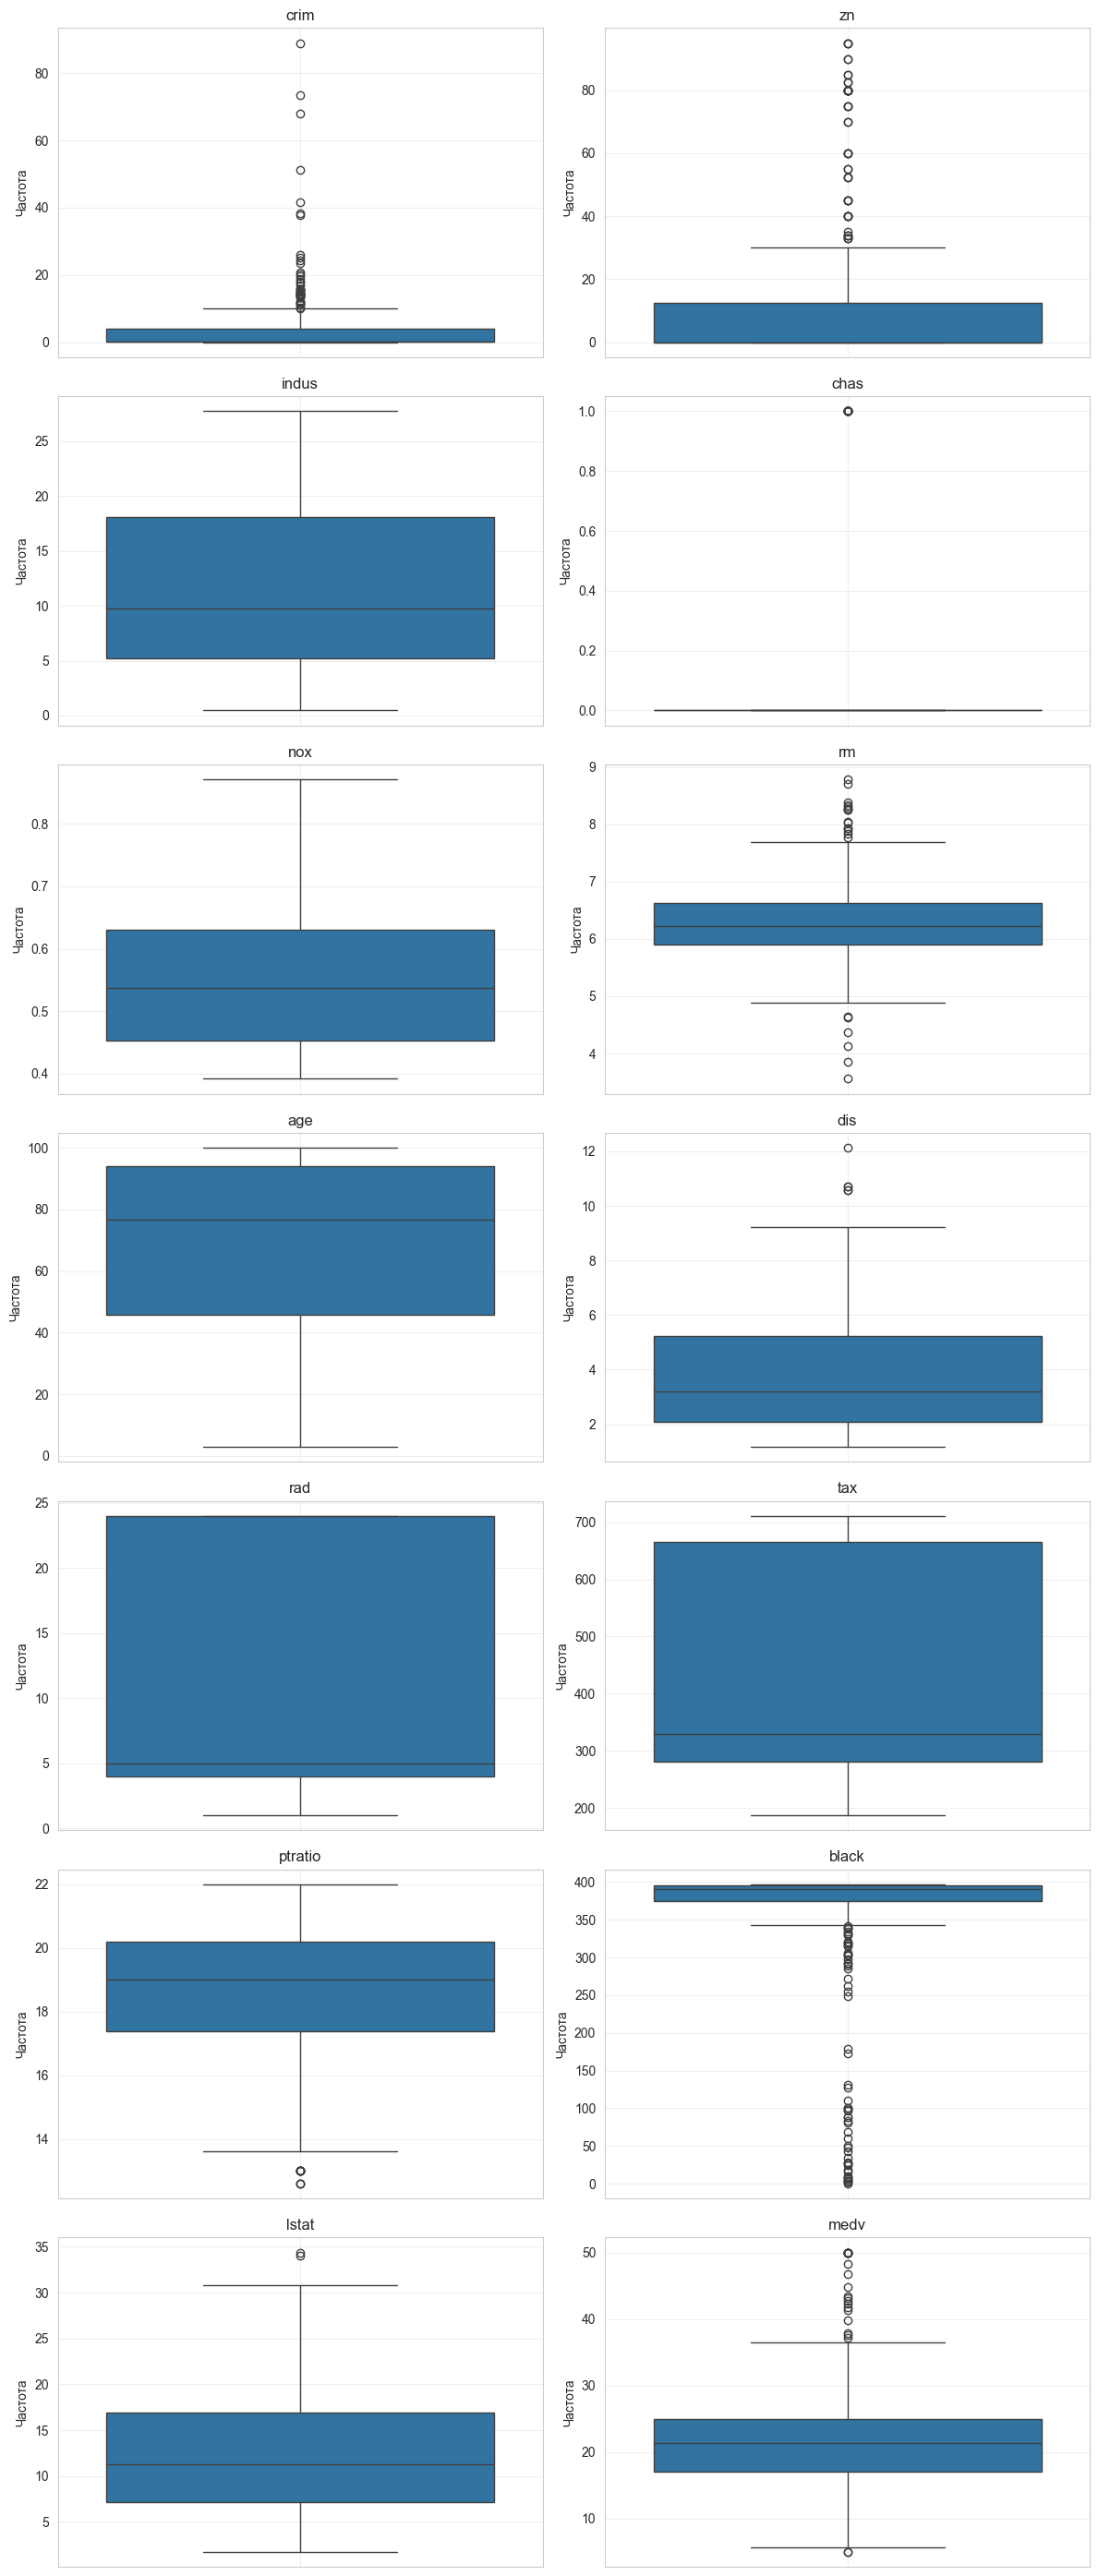

In [88]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

numeric_cols = []
binary_cols = []
for col in df.columns:
    unique_vals = df[col].unique()
    if len(unique_vals) == 2: binary_cols.append(col)
    else: numeric_cols.append(col)

print(binary_cols)
print(numeric_cols)

def showBoxplots():
    n_cols = 2
    n_rows = len(numeric_cols) // n_cols + (1 if len(numeric_cols) % n_cols else 0)

    plt.figure(figsize=(12, 4 * n_rows))

    for i, col in enumerate(df.columns):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(data=df[col])
        plt.xticks(rotation=45)
        plt.title(f'{col}')
        plt.ylabel('Частота')
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
showBoxplots()

Очистка выбросов

In [ ]:
outlier_indices = set()

for col in numeric_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outlier_indices.update(df[(df[col] < lower) | (df[col] > upper)].index)

df_clean = df.drop(index=outlier_indices).reset_index(drop=True)
print(f"Очищено: {len(outlier_indices)} строк")
df = df_clean
showBoxplots()

Очищено: 158 строк


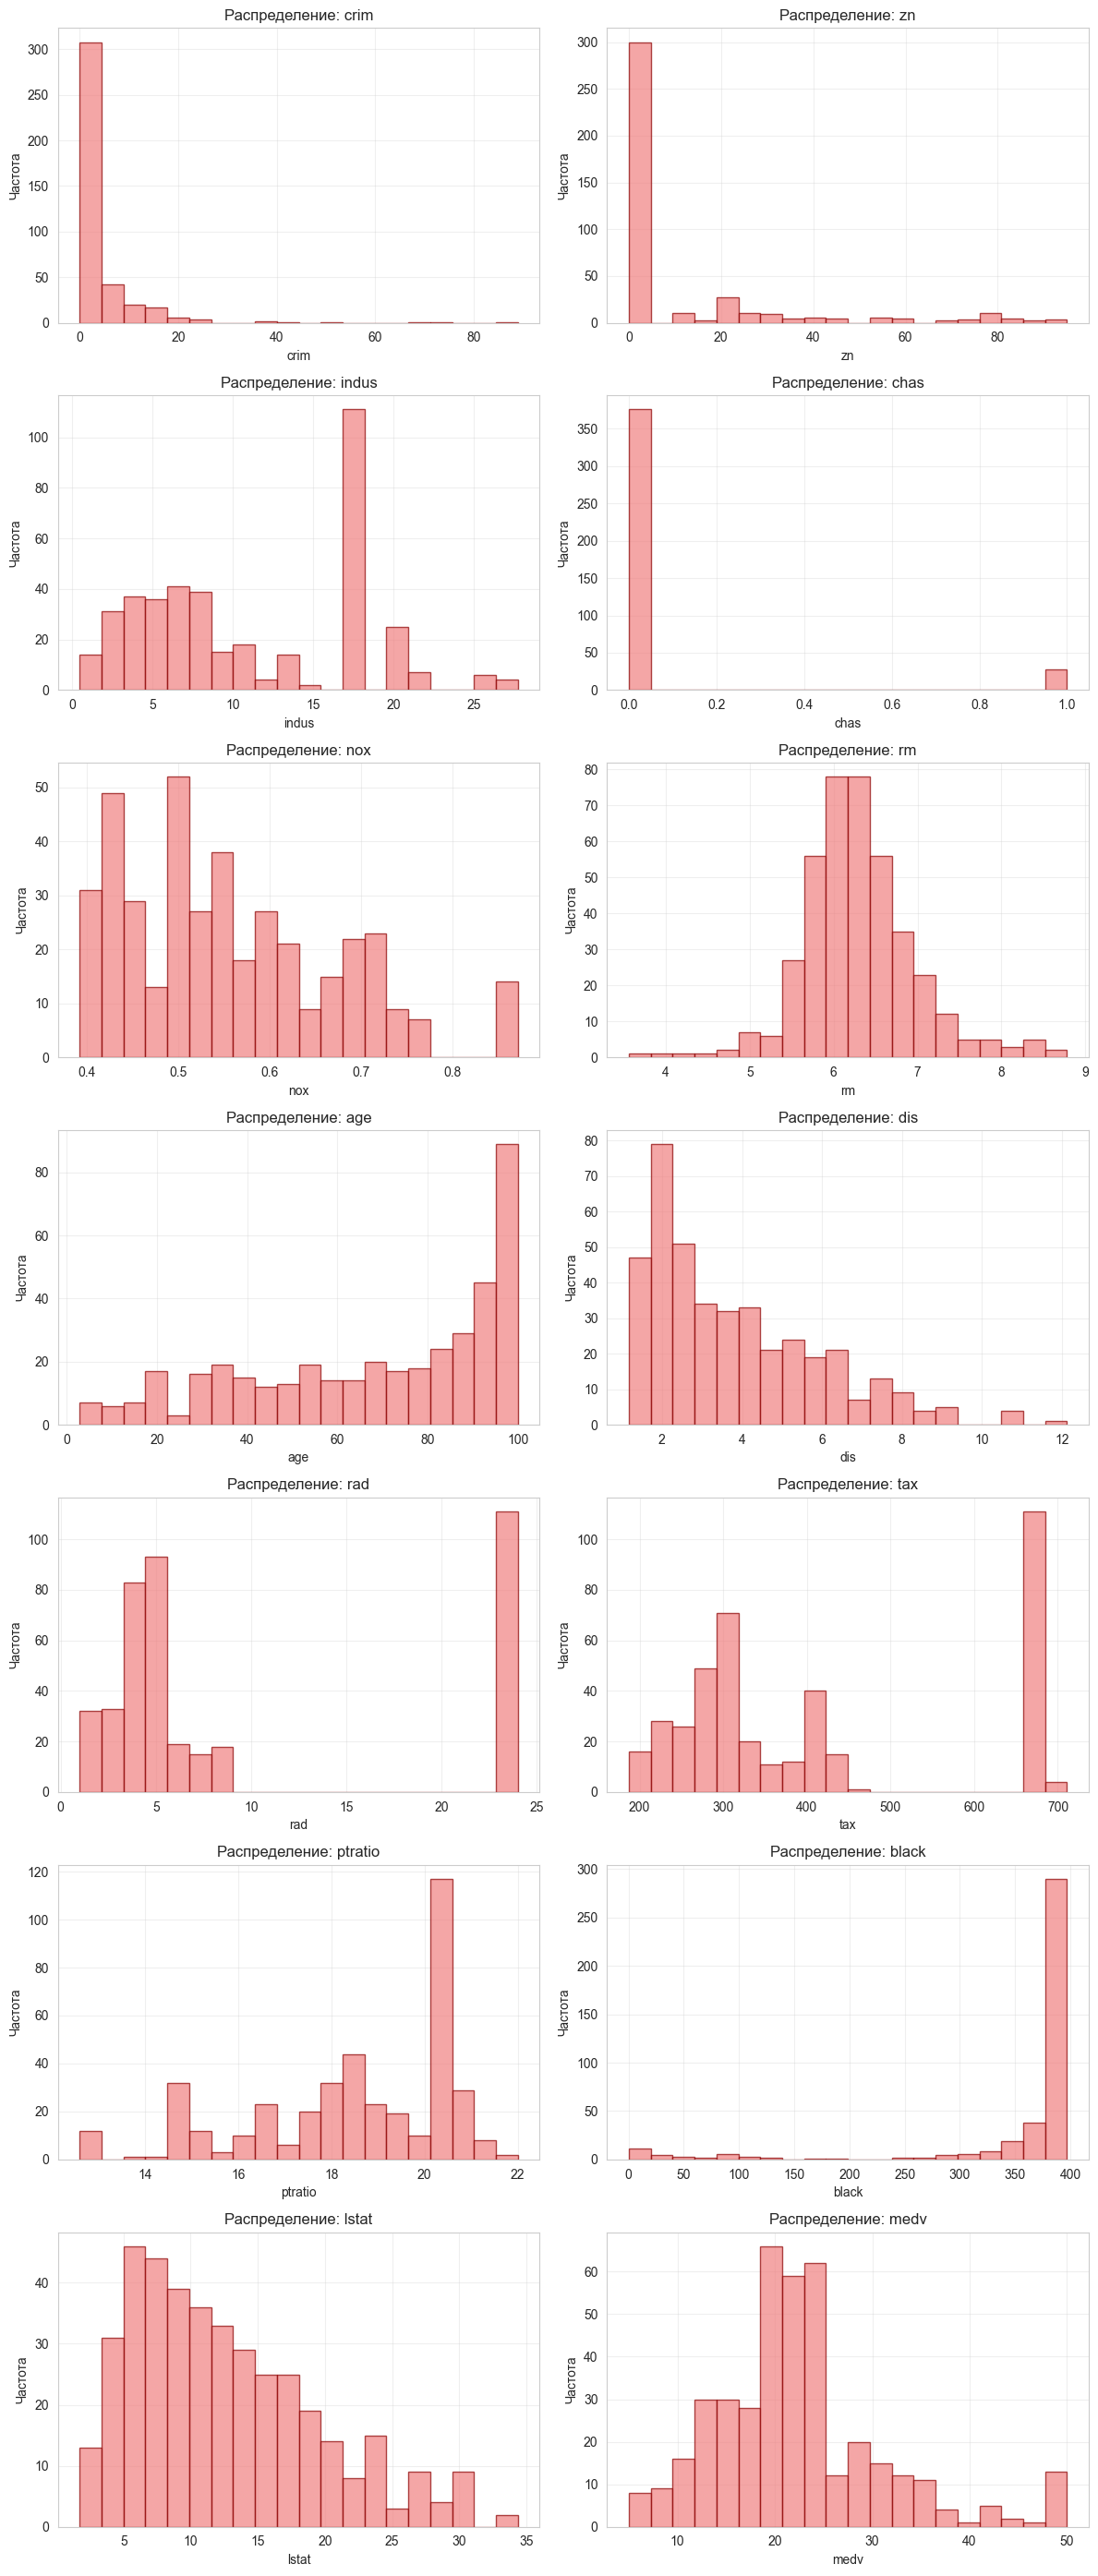

In [90]:
n_cols = 2
n_rows = len(numeric_cols) // n_cols + (1 if len(numeric_cols) % n_cols else 0)

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df[col], bins=20, color='lightcoral', edgecolor='darkred', alpha=0.7)
    plt.title(f'Распределение: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Матрица корреляций

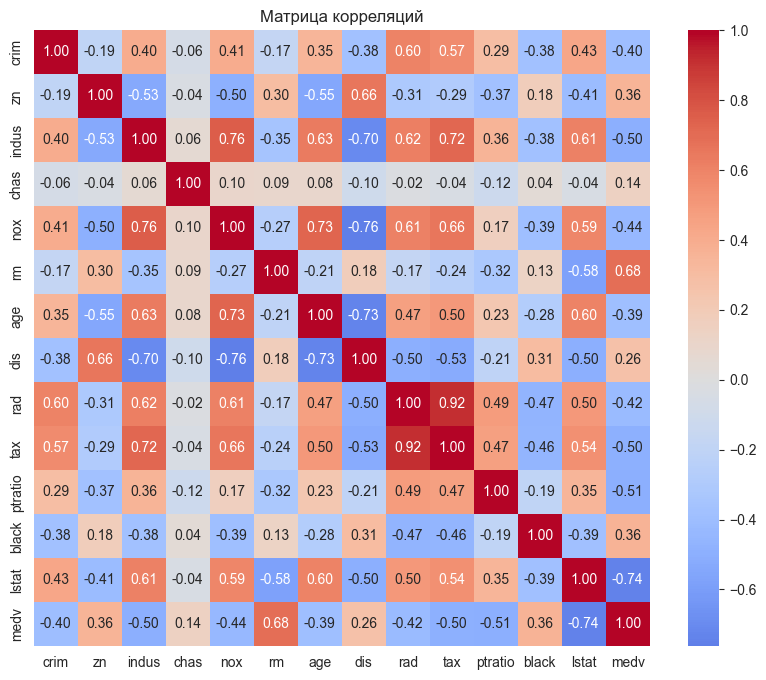

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
             annot=True,
             cmap='coolwarm',
             center=0,
             square=True,
             fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

Скейлинг

In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df = df_scaled

Обучение

In [ ]:
target = 'medv'



medv
